# DS Workshop Day 1 : Dealing with Data 


## Welcome to this data science workshop by [GeeksHub](https://www.facebook.com/GeeksHUB.eg) !!! 
(check out our page for more details)  &#128064;



### Our problem : predicting the rating of apps from the [Google Play Store Apps Dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps/code?datasetId=49864&language=Python&outputs=Visualization&tagIds=13201%2C16614)

### Day 1️⃣: Tips and Tricks for Data Preparation and Exploratory Data Analysis (1.5 – 2 hours)

* Set the stage for an exciting data science journey.

* Advanced Data Cleaning with Pandas.

* Techniques for handling missing data.

* Removing outliers and anomalies.

* Exploratory Data Analysis (EDA) with Matplotlib.

* Advanced plotting and visualization.

* Extracting insights from data.

### Day 2️⃣: Machine Learning Review (2 hours)

* Model training and selection.

* Understanding model evaluation and performance metrics.

* Selecting the best algorithm for a task.

* Extra: Hyperparameter Tuning.

* Extra: Optimizing model performance.

* Practical: Apply these Conceptston your Selected Dataset (1.5 hours)


### Day 3️⃣: Finalize our Project. Open discussion about the most common Technical Issues.

Our instructors will guide you through each topic, and you'll have the opportunity to apply your learning to real-world datasets, gaining valuable practical experience.




*This workshop is reviewed and supervised by Eng. Ahmed Abdelmalek – Senior NLP Engineer @WideBot - [Linkedin](https://www.linkedin.com/in/ahmed-abdelmalek/)*

*And taught by:*

*Mustafa Osama, NLP engineer @Widebot - [Linkedin](https://www.linkedin.com/in/mustafa-osama-164254232/)*

*Abdelrahman Mohamed, Clinical data analyst and Co-founder of GeeksHub- [Linkedin](https://www.linkedin.com/in/abdelrahman-mohamed-%F0%9F%87%B5%F0%9F%87%B8-210ab81b7/)*


# Day 1 : Tips and Tricks for Data Preparation and Exploratory Data Analysis 

![meme1](meme.jpeg)



**Remember to check the description of the dataset from the link provided to better understand the data we will be working on but accounting for the lazy ones here's a quick description of the dataset**  &#128064; 



*The dataset is produced by scraping of the google app store containing the following information about each app:*
    
   * App (name)
   * Category 
   * Rating
   * Reviews
   * Size
   * Installs (number of installation)
   * Type (free or paid)
   * Price
   * Content Rating (appropriate for which age group)
   * Genres (more than one genre can co-exist in one game)
   
   
   

### What will we do day 1 in a nutshell:
1. Cleaning the data (one problem at a time)
2. Exploring relationships in the data (exploratory data analysis)
3. Creating more meaningful visualisations (explanatory data analysis)

**The notebook will alternate from common-knowledge techniques and advanced methods as well as practice to be done by the students themselves**

In [1]:
## imports  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from pylab import rcParams 
import statsmodels.api as sm
from scipy import stats
plt.style.use('default')


## 1. Cleaning the data : One Problem at a Time
### Essential questions to ask:
* are there duplicates?
* are there data entry anamolies?
* are the features saved in the appropriate datatype?
* are there missing values?
* is there uniformity in the formating of indvidual features? 
* are there meanningless features and what more meaningful features can we extract? 
* can we reduce the cardinality of highly cardinal variables? (ML-based question) (also what features should we include for our ML?)
* are there outliers?(next notebook)

### 1.0 General exploration of the data

In [2]:
## read the data 
data=pd.read_csv("googleplaystore.csv")
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))
                                                                        

There are 10841 observations and 13 features in this dataset. 



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


*observations:* 
* there are missng values in Ratings column 
* Reviews and Price columns shouldn't be object but numerical instead 
* Last updated could be datetime type instead of object 

In [5]:
# A statistical summary for quantitative data
data.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

*observation* : there is an obvious outlier (19)

In [6]:
# The number of unique Applications
data['App'].nunique()

9660

In [7]:
data.duplicated().sum()

483

*observation:* there are duplicates as some apps appear to be scraped twice 

In [8]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
# For loop to find the Statistics of each Column and its Type.

for i in list(data.columns):
    
    print("\n ************ "+i+" ************\n")
    print("\n",data[i].value_counts())
    print("\n",data[i].describe(),"\n")


 ************ App ************


 ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

 count      10841
unique      9660
top       ROBLOX
freq           9
Name: App, dtype: object 


 ************ Category ************


 FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSON

*observations:*
* there is a wrongly included valye in Category column (1.9) 
* there is a wrongly included valye in Installs column (Free) 
* Size can have a more unique formatting 
* installs has unncessary many unique values ( can be reduced or converted to discrete?) 
* there is a wrongly included value in the Type column (0)
* Content Rating has the value "Everyone" included twice with two different formating 
* Genre could be easily spread out on extra dummy columns 
* Version columns are unnecessarily variable

### 1.1 Basic Cleaning 

In [10]:
### duplicates 
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [11]:
##  correct wrongly inputed values 
data["Rating"].replace(19,1.9,inplace=True)

## viewing wrongly inputed rows
data.drop(data.index[data['Installs'] =='Free'], inplace = True)
data.drop(data.index[data['Category'] ==1.9], inplace = True)
data.drop(data.index[data["Type"] ==0], inplace = True)



In [12]:
print(data.Installs.value_counts(),"\n")
print(data.Category.value_counts(),"\n")
print(data.Type.value_counts(),"\n")

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64 

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING  

In [13]:
## datatypes 
## correcting Reviews, price and last updated 
data.loc[:,["Reviews","Price","Last Updated"]]

Reviews Price      Last Updated
0         159     0   January 7, 2018
1         967     0  January 15, 2018
2       87510     0    August 1, 2018
3      215644     0      June 8, 2018
4         967     0     June 20, 2018
...       ...   ...               ...
10836      38     0     July 25, 2017
10837       4     0      July 6, 2018
10838       3     0  January 20, 2017
10839     114     0  January 19, 2015
10840  398307     0     July 25, 2018

[10357 rows x 3 columns]

In [14]:
data["Reviews"]=data["Reviews"].astype(int)

In [15]:
##data["Price"]=data["Price"].astype(float)

In [16]:
data["Price"]=data["Price"].str.replace("$","").astype(float)

/var/folders/1v/cxnfyvx13kg6cbtymv16tsv80000gn/T/ipykernel_726/175810921.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [17]:
data["Last Updated"]=pd.to_datetime(data["Last Updated"])

In [18]:
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                      object
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [19]:
data.loc[:,["Reviews","Price","Last Updated"]]

Reviews  Price Last Updated
0          159    0.0   2018-01-07
1          967    0.0   2018-01-15
2        87510    0.0   2018-08-01
3       215644    0.0   2018-06-08
4          967    0.0   2018-06-20
...        ...    ...          ...
10836       38    0.0   2017-07-25
10837        4    0.0   2018-07-06
10838        3    0.0   2017-01-20
10839      114    0.0   2015-01-19
10840   398307    0.0   2018-07-25

[10357 rows x 3 columns]

In [20]:
## missing values
data.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [21]:
## Ratings is our main target varaible so the unlabeled rows must be removed  
data.dropna(subset=["Rating"],inplace=True)

In [22]:
## other columns we can use mode imputation 
data["Current Ver"]=data["Current Ver"].fillna(data["Current Ver"].mode())
data["Android Ver"]=data["Android Ver"].fillna(data["Android Ver"].mode())
data["Type"].fillna(data["Type"].mode(),inplace=True)

In [23]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [24]:
## Why didn't fillna work?
## maybe the cells are empty but not saved as nan?
data[data["Android Ver"]==""]=np.nan
data[data["Current Ver"]==""]=np.nan
data["Current Ver"]=data["Current Ver"].fillna(data["Current Ver"].mode()[0])
data["Android Ver"]=data["Android Ver"].fillna(data["Android Ver"].mode()[0])

In [25]:
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 1.2 Some Thoughtful cleaning

In [26]:
## are variables saved in a uniform format ?
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size     Installs  Type  Price Content Rating  \
0     159.0   19M      10,000+  Free    0.0       Everyone   
1     967.0   14M     500,000+  Free    0.0       Everyone   
2   87510.0  8.7M   5,000,000+  Free    0.0       Everyone   
3  215644.0   25M  50,000,000+  Free    0.0           Teen   
4     967.0  2.8M     100,000+  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  
0               Art & Design   2018-01-07               1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play   2018-01-15               2.0.0  4.0.3 and up  
2               Art & Design   2018-08-01               1.2.4  4.0.3 and up  
3               Art & Design   2018-06-08  Varies with device    4.2 and up  
4    Art & Design;Creativity   2018-06-20                 1.1    4.4 and up

In [27]:
data["Content Rating"].value_counts()

Everyone           7095
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [28]:
## how do you think we can improve this ?
data["Content Rating"].replace({"Everyone":"Everyone 10+",
                                "Adults only 18+":"Mature 17+",
                                "Unrated":"Everyone 10+"}
                                ,inplace=True)


In [29]:
data["Content Rating"].value_counts()

Everyone 10+    7456
Teen            1022
Mature 17+       414
Name: Content Rating, dtype: int64

In [30]:
## more meaningful presentation of last updated column
data["Last Updated Year"] = data["Last Updated"].dt.year
data["Last Updated Season"] = data["Last Updated"].dt.month.map(lambda x: "winter" if 12 >= x >= 1 or x == 12 else "summer")



In [31]:
# Converting the column "Size" to float
# There are sizes counted in mb, kb, in numbers without measurement unit and with "varies with device"

# Removing "M" which is the mb for the size
data.Size= data["Size"].str.replace("M", "")
data.Size= data['Size'].str.replace("Varies with device","-1")

#Here we replace k and change the unit to Mb
data['Size']=data['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024),1) )if x[-1]=='k' else x)
data["Size"]=data["Size"].astype(float)

In [32]:
# To convert the column "Installs" into float
# So, firstly remove the "+"
data.Installs= data["Installs"].str.replace("+", "")

# While converting the column into float,we have to remove ',' to
# So, removing the commas
data.Installs= data["Installs"].str.replace(",", "")


# Convert the data in "Installs" to numeric
data["Installs"] = pd.to_numeric(data["Installs"])

/var/folders/1v/cxnfyvx13kg6cbtymv16tsv80000gn/T/ipykernel_726/2895791073.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



the distribution was distorted , we might consider trying removing this column as a whole when experimenting in ML section 

In [33]:
data.Genres.value_counts()

Tools                          733
Entertainment                  498
Education                      446
Action                         349
Productivity                   334
                              ... 
Casual;Music & Video             1
Board;Pretend Play               1
Health & Fitness;Education       1
Music & Audio;Music & Video      1
Strategy;Creativity              1
Name: Genres, Length: 115, dtype: int64

In [34]:
## let us try something
example=data['Genres'].str.get_dummies(sep=";")
example

Action  Action & Adventure  Adventure  Arcade  Art & Design  \
0           0                   0          0       0             1   
1           0                   0          0       0             1   
2           0                   0          0       0             1   
3           0                   0          0       0             1   
4           0                   0          0       0             1   
...       ...                 ...        ...     ...           ...   
10834       0                   0          0       0             0   
10836       0                   0          0       0             0   
10837       0                   0          0       0             0   
10839       0                   0          0       0             0   
10840       0                   0          0       0             0   

       Auto & Vehicles  Beauty  Board  Books & Reference  Brain Games  ...  \
0                    0       0      0                  0            0  ...   
1                    0       0      0                  0            0  ...   
2                    0       0      0                  0            0  ...   
3                    0       0      0                  0            0  ...   
4                    0       0      0                  0            0  ...   
...                ...     ...    ...                ...          ...  ...   
10834                0       0      0                  0            0  ...   
10836                0       0      0                  0            0  ...   
10837                0       0      0                  0            0  ...   
10839                0       0      0                  1            0  ...   
10840                0       0      0                  0            0  ...   

       Simulation  Social  Sports  Strategy  Tools  Travel & Local  Trivia  \
0               0       0       0         0      0               0       0   
1               0       0       0         0      0               0       0   
2               0       0       0         0      0               0       0   
3               0       0       0         0      0               0       0   
4               0       0       0         0      0               0       0   
...           ...     ...     ...       ...    ...             ...     ...   
10834           0       0       0         0      0               0       0   
10836           0       0       0         0      0               0       0   
10837           0       0       0         0      0               0       0   
10839           0       0       0         0      0               0       0   
10840           0       0       0         0      0               0       0   

       Video Players & Editors  Weather  Word  
0                            0        0     0  
1                            0        0     0  
2                            0        0     0  
3                            0        0     0  
4                            0        0     0  
...                        ...      ...   ...  
10834                        0        0     0  
10836                        0        0     0  
10837                        0        0     0  
10839                        0        0     0  
10840                        0        0     0  

[8892 rows x 53 columns]

In [35]:
data["Category"].nunique()

33

it appears that dealing with category as is would be better in terms of dimensionality 

In [36]:
def lower_cardinality(col,cut_off=10):
    old_cardinality=data[col].nunique()
    less_than10=[x for x in data[col].unique() if (len(data[data[col]==x])<cut_off)]
    data[col]=np.where(data[col].isin(less_than10),"OTHER",data[col])
    print(f"Cardinality decreased from {old_cardinality} to {data[col].nunique()}")

In [37]:
data["Category"].value_counts()

FAMILY                 1718
GAME                   1074
TOOLS                   734
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         310
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [38]:
lower_cardinality("Category",cut_off=300)
data["Category"].value_counts()

Cardinality decreased from 33 to 11


OTHER              3187
FAMILY             1718
GAME               1074
TOOLS               734
PRODUCTIVITY        334
FINANCE             317
PERSONALIZATION     310
COMMUNICATION       307
LIFESTYLE           305
PHOTOGRAPHY         304
MEDICAL             302
Name: Category, dtype: int64

"Current Ver" and "Andriod Ver" seems to will have negative effect more than positive however there are a few ideas feel free to try them on your own:
1. creating a boolean variable for version being more than 1 
2. getting only the first number of the version rather than entire sequence

## 1.3 Visualisation

In [39]:
# Task Abstraction: Shows the count of each type of the applications (free or paid)
# Annotate the count on each bar

y=data["Type"].value_counts()
fig=px.histogram(data,x="Type",title='Values Count for each Type of The Applications')
fig.update_traces(marker_line_color="black",marker_line_width=2, opacity=0.6, text=y,
                  marker_color=["red","cyan"],textfont=dict(size=20))
fig.show()

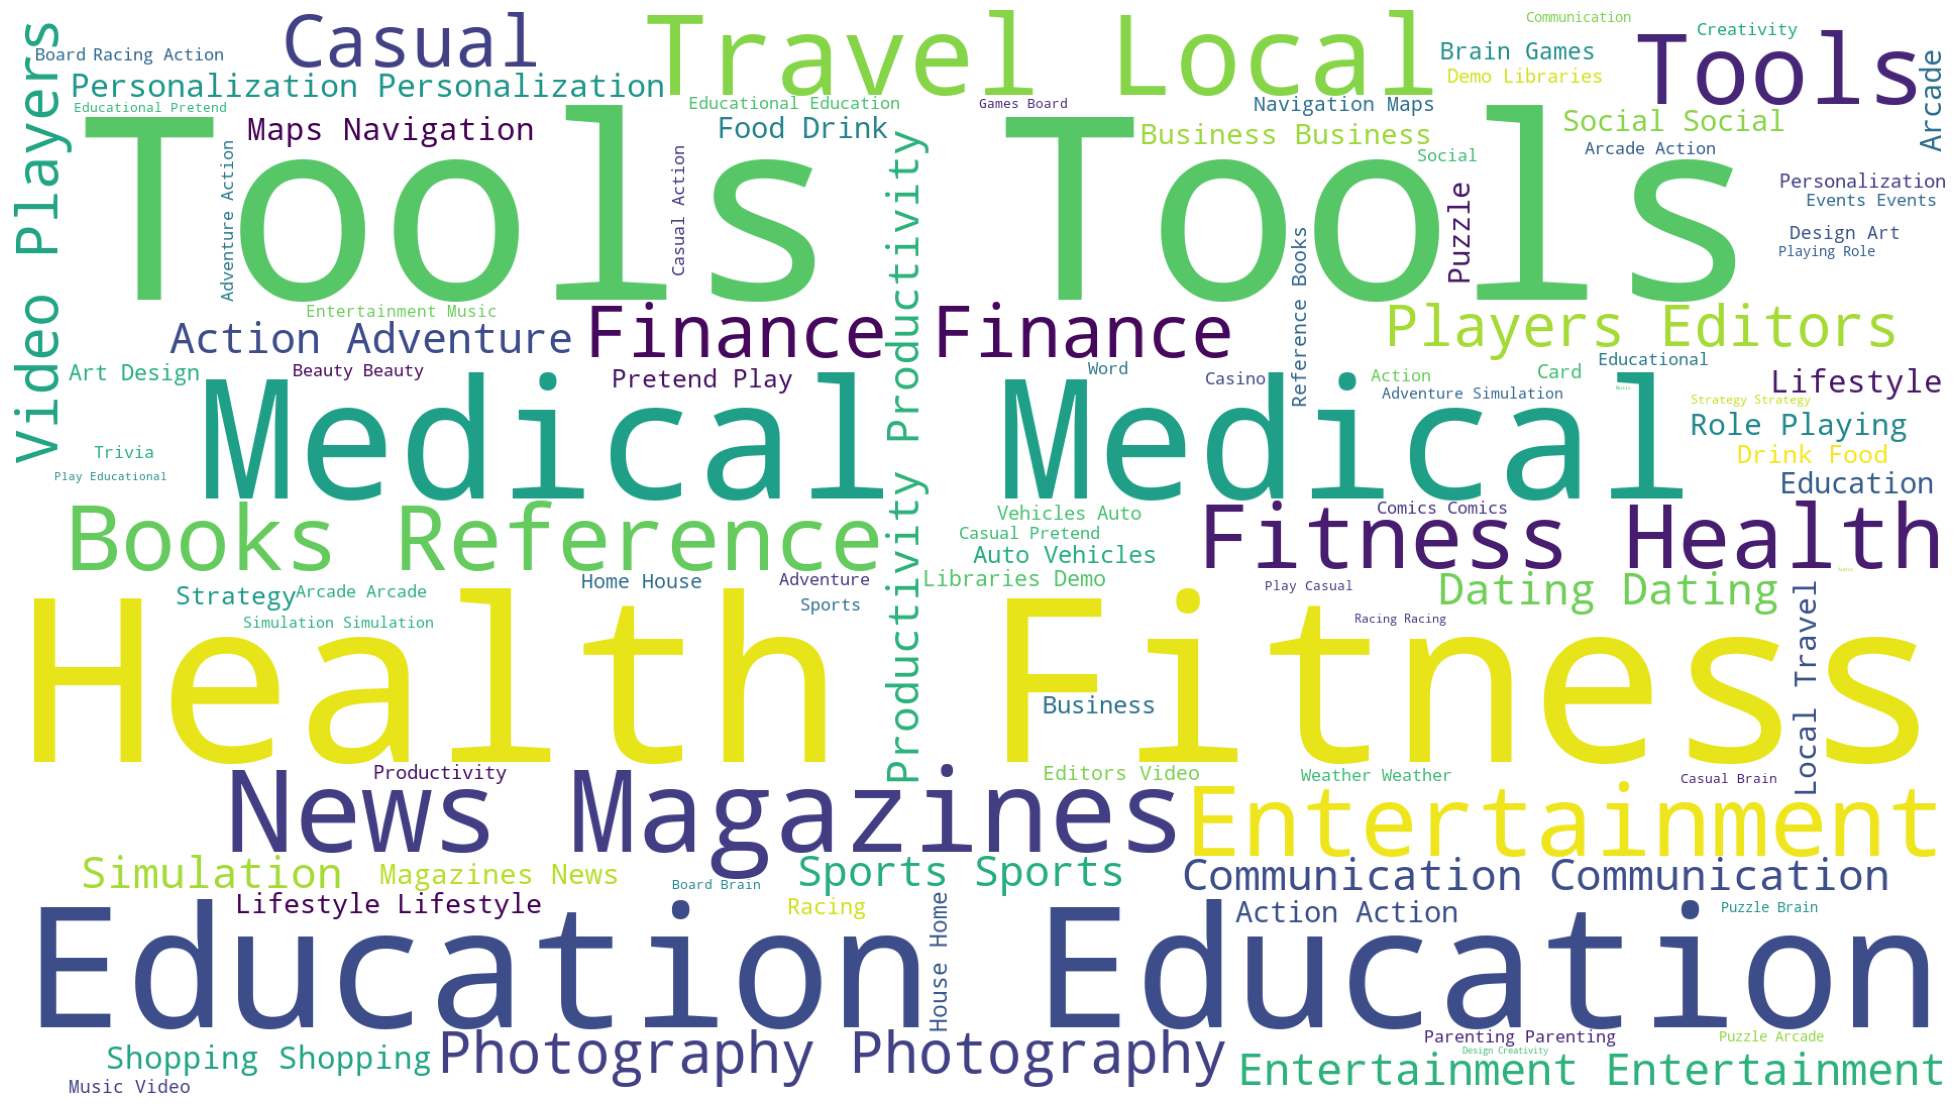

In [40]:
# As a column "Genres" Type is String then We use wordcloud visual which concatenates all columns and represents 
# them as cloud and the font is adjustable due to the frequency of each word in this columns.

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color="white"
                          ,width=1920,
                          height=1080,
                         ).generate(" ".join(data.Genres))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [41]:
# Task Abstraction:Show the ratings for the most famous Five applications and show their categories.
# 1. Sorting in descending order The dataset by the number of installations.
# 2.Extract the TopN (5)
# 3.Construct this chart as X is the name of Applications and Y is the Rating of the the Top 7 
# 4.Using the color as Third variable  for the Caterories.

Graph2= data.sort_values(by='Installs', ascending=False ,inplace=False).head(7)
fig = px.bar(Graph2, x='App', y='Rating',color='Category',range_y=[0,5])
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

Graph2

App       Category  Rating  \
382   Messenger – Text and Video Chat for Free  COMMUNICATION     4.0   
3454                              Google Drive   PRODUCTIVITY     4.4   
2545                                 Instagram          OTHER     4.5   
3234                                    Google          TOOLS     4.4   
3909                                 Instagram          OTHER     4.5   
4144                                   Google+          OTHER     4.2   
1654                            Subway Surfers           GAME     4.5   

         Reviews  Size    Installs  Type  Price Content Rating         Genres  \
382   56646578.0  -1.0  1000000000  Free    0.0   Everyone 10+  Communication   
3454   2731171.0  -1.0  1000000000  Free    0.0   Everyone 10+   Productivity   
2545  66577313.0  -1.0  1000000000  Free    0.0           Teen         Social   
3234   8033493.0  -1.0  1000000000  Free    0.0   Everyone 10+          Tools   
3909  66509917.0  -1.0  1000000000  Free    0.0           Teen         Social   
4144   4828372.0  -1.0  1000000000  Free    0.0           Teen         Social   
1654  27722264.0  76.0  1000000000  Free    0.0   Everyone 10+         Arcade   

     Last Updated         Current Ver         Android Ver  Last Updated Year  \
382    2018-08-01  Varies with device  Varies with device               2018   
3454   2018-08-06  Varies with device  Varies with device               2018   
2545   2018-07-31  Varies with device  Varies with device               2018   
3234   2018-08-03  Varies with device  Varies with device               2018   
3909   2018-07-31  Varies with device  Varies with device               2018   
4144   2018-07-26  Varies with device  Varies with device               2018   
1654   2018-07-12              1.90.0          4.1 and up               2018   

     Last Updated Season  
382               winter  
3454              winter  
2545              winter  
3234              winter  
3909              winter  
4144              winter  
1654              winter

In [42]:
# Task Abstraction: Show the number of reviewers for the most famous Five applications.
# Visual ecoding by human Interaction: Notice... Is is that reasonable to make decisions regarding
# one or two -out of five applications- that showing they are the best one for stakeholders to invest in?
# 1.Show the Number (percentages) of Reviews by the sectors of the pie which represent the names of Top 5 applications  

fig = px.pie(Graph2, values='Reviews', names='App',color='App', title='Number of Reviews for the TopN Applications')
fig.show()

Graph2

App       Category  Rating  \
382   Messenger – Text and Video Chat for Free  COMMUNICATION     4.0   
3454                              Google Drive   PRODUCTIVITY     4.4   
2545                                 Instagram          OTHER     4.5   
3234                                    Google          TOOLS     4.4   
3909                                 Instagram          OTHER     4.5   
4144                                   Google+          OTHER     4.2   
1654                            Subway Surfers           GAME     4.5   

         Reviews  Size    Installs  Type  Price Content Rating         Genres  \
382   56646578.0  -1.0  1000000000  Free    0.0   Everyone 10+  Communication   
3454   2731171.0  -1.0  1000000000  Free    0.0   Everyone 10+   Productivity   
2545  66577313.0  -1.0  1000000000  Free    0.0           Teen         Social   
3234   8033493.0  -1.0  1000000000  Free    0.0   Everyone 10+          Tools   
3909  66509917.0  -1.0  1000000000  Free    0.0           Teen         Social   
4144   4828372.0  -1.0  1000000000  Free    0.0           Teen         Social   
1654  27722264.0  76.0  1000000000  Free    0.0   Everyone 10+         Arcade   

     Last Updated         Current Ver         Android Ver  Last Updated Year  \
382    2018-08-01  Varies with device  Varies with device               2018   
3454   2018-08-06  Varies with device  Varies with device               2018   
2545   2018-07-31  Varies with device  Varies with device               2018   
3234   2018-08-03  Varies with device  Varies with device               2018   
3909   2018-07-31  Varies with device  Varies with device               2018   
4144   2018-07-26  Varies with device  Varies with device               2018   
1654   2018-07-12              1.90.0          4.1 and up               2018   

     Last Updated Season  
382               winter  
3454              winter  
2545              winter  
3234              winter  
3909              winter  
4144              winter  
1654              winter

In [43]:
# Treemap

# Task Abstraction:Decide which combination of content rating and catergory are the best for the the stakeholders or
# Reflect what the trends are in the mobile applications industry.

# 0:Grouping the dataset by content Rating and Category and aggregate the ratings as means.
# 1. Sorting This group by the Ratings in descending order .
# 2.Extract the TopN (20)
# 3.Construct this map as  the parent is  the content Rating and the child is the Categories. 
# 4.Using the color as Third variable  for as a grading system for the values of Ratings .

data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Group by 'Category' and 'Content Rating' and calculate the mean rating
Graph = data.groupby(['Category', 'Content Rating'])['Rating'].mean()

# Sort the groups by rating in descending order and select the top 20
Graph3 = Graph.sort_values(ascending=False).head(20)

# Display the summary statistics of the top 20 groups
print(Graph3.describe())

# Reset the index to turn the result into a DataFrame
reset_indx1 = Graph3.reset_index()

count    20.000000
mean      4.345691
std       0.120405
min       4.196788
25%       4.254861
50%       4.312077
75%       4.427574
max       4.600000
Name: Rating, dtype: float64


In [44]:
fig = px.treemap(reset_indx1,
    path=['Content Rating', 'Category'],
    values='Rating',
    color='Rating',
    color_continuous_scale=["red", "white", "green"],
    title="Content Rating/ Category Overview")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

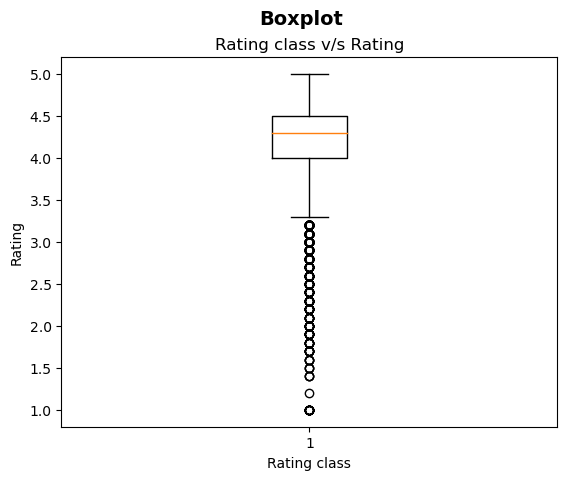

In [45]:
# Boxplot of 'Rating' variable
fig = plt.figure()
fig.suptitle('Boxplot', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(data['Rating'])
ax.set_title('Rating class v/s Rating')
ax.set_xlabel('Rating class')
ax.set_ylabel('Rating')
plt.show()

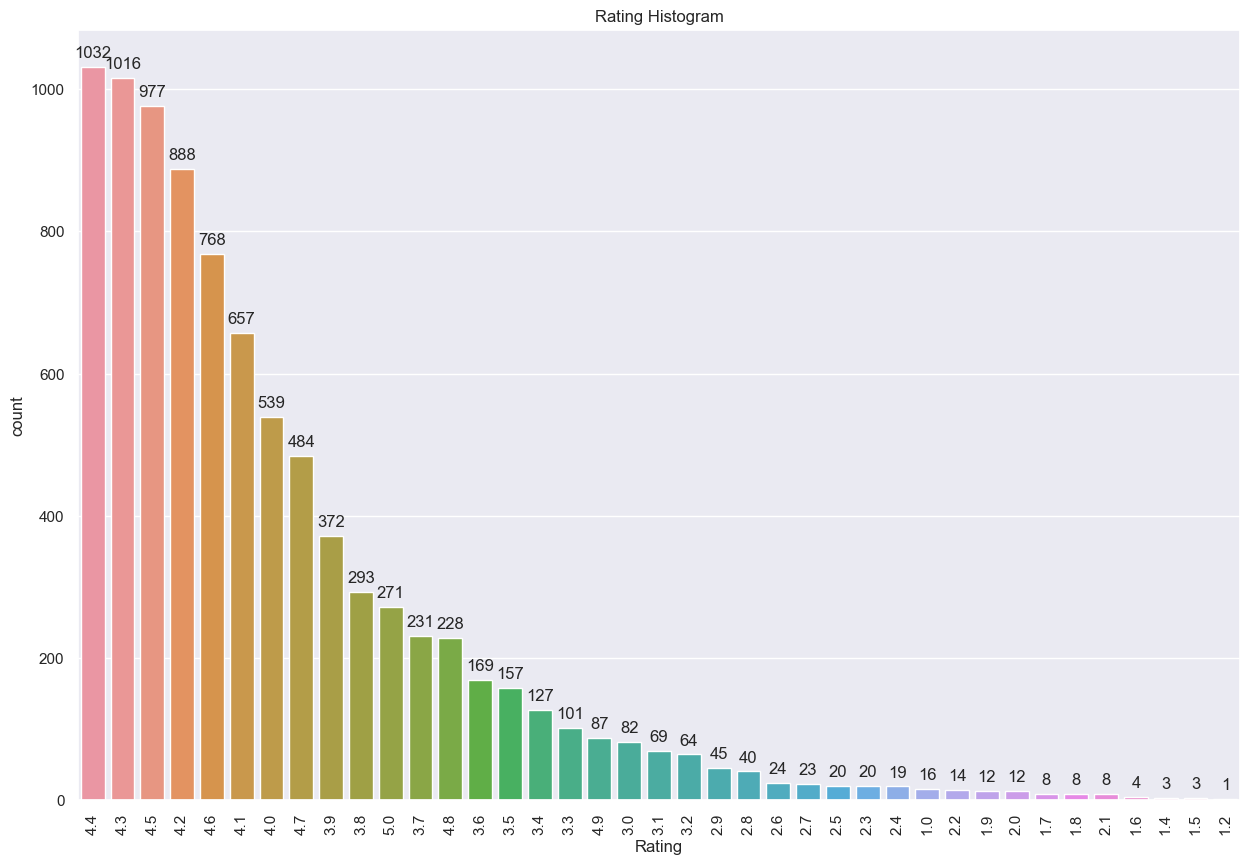

In [46]:
# Rating vs Count Bar Plot
# Sorted descendingly

plt.figure(figsize=(15,10))
sb.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Rating Histogram")
ax = sb.countplot(x="Rating", data=data, order = data['Rating'].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

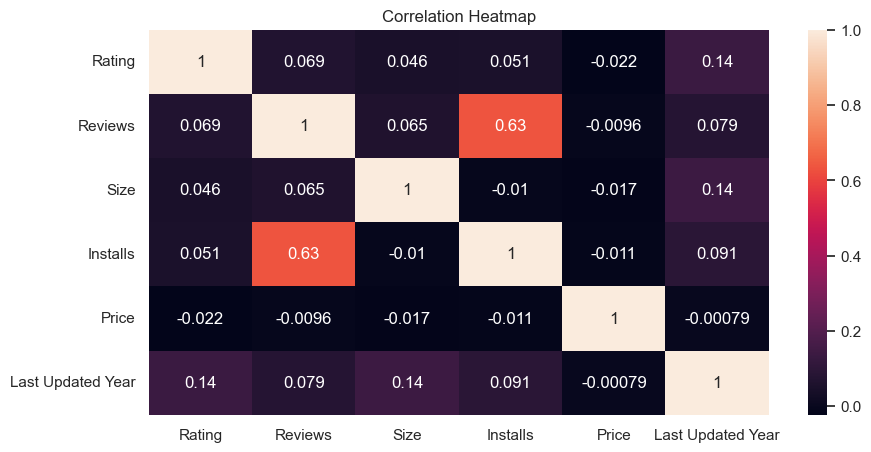

In [47]:
# Assuming 'data' is your DataFrame, you can select numeric columns like this:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_data.corr()

# Create a figure with a specific size
plt.figure(figsize=(10, 5))

# Create a heatmap with annotations
sb.heatmap(corr, annot=True)

# Set the plot title
plt.title("Correlation Heatmap", fontsize=12)

# Show the plot
plt.show()

In [48]:
data.to_csv("data_cleaned.csv", index= False)